# Optimization

In [103]:
%matplotlib inline
import numpy as np
import time
import math
import torch
from mpl_toolkits import mplot3d
from torch import nn
from d2l import torch as d2l

## Introduction to concepts: Objective function and convexity

### Objective function and optimization Challenges

In [104]:
def f(x):
    # risk function
    return x * torch.cos(np.pi * x)
def g(x):
    # empirical risk function
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

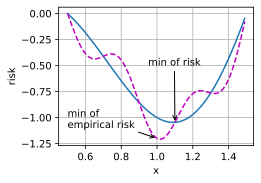

In [105]:
def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))
x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

#### Local minima are problematic

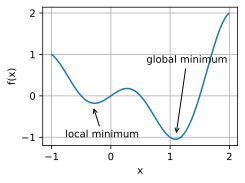

In [106]:

x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

#### Saddle points are problematic

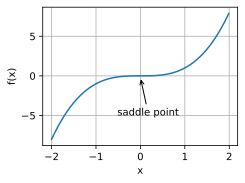

In [107]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

Saddle points in higher dimensions are even more insidious, as the example below shows.

(0,0) This is a maximum with respect to 𝑦 and a minimum with respect to 𝑥.

Text(0.5, 0.5, 'y')

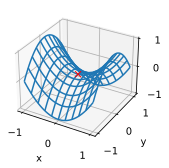

In [108]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx', zorder=10)  # saddle point
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')


#### In general:

Assume that the input of a function is a 𝑘-dimensional vector and its output is a scalar, its *Hessian matrix* will have 𝑘 eigenvalues. 
The solution of the function could be a local minimum, a local maximum, or a saddle point at a position where the function gradient is
zero:

- When the eigenvalues of the function’s Hessian matrix at the zero-gradient position are
all positive, we have a local minimum for the function.
- When the eigenvalues of the function’s Hessian matrix at the zero-gradient position are
all negative, we have a local maximum for the function.
- When the eigenvalues of the function’s Hessian matrix at the zero-gradient position are
negative and positive, we have a saddle point for the function.

For high-dimensional problems the likelihood that at least some of the eigenvalues are neg-
ative is quite high. This makes saddle points more likely than local minima. 

#### vanishing gradients are problematic

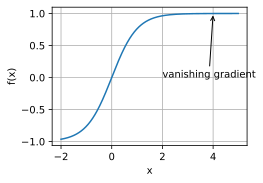

In [109]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

### Convexity

In [110]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

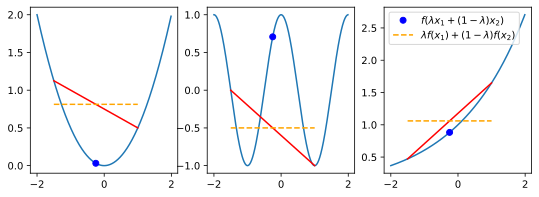

In [111]:
f = lambda x: 0.5 * x**2  # Convex
g = lambda x: torch.cos(np.pi * x)  # Nonconvex
h = lambda x: torch.exp(0.5 * x)  # Convex


x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])

# i want to illustrate that the functions are convex or not convex by plotting the line segment between two points 
# and then comparing lambda*f(x1) + (1 - lambda)*f(x2) to the function value at the midpoint (Lambda = 0.5: (x1 + x2) / 2)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    ax.plot(x.numpy(), func(x).numpy())
    ax.plot(segment.numpy(), func(segment).numpy(), 'r-')
    midpoint = (segment[0] + segment[1]) / 2
    ax.plot(midpoint.numpy(), func(midpoint).numpy(), 'bo', label=r'$f(\lambda x_1 + (1 - \lambda) x_2)$')
    ax.hlines(0.5 * (func(segment[0]) + func(segment[1])), xmin=segment[0].item(), xmax=segment[1].item(), 
              color='orange', linestyle='--', label=r'$\lambda f(x_1) + (1 - \lambda) f(x_2)$')
plt.legend()
plt.show()

As expected, the cosine function is nonconvex, whereas the parabola and the exponential function are. Note that the exponential doesn't have a minimum.

## Gradient Descent

In [112]:
def f(x):  # Objective function
    return x ** 2
def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

In [113]:
def gd(eta, f_grad):
    x = 10
    results = [x]
    for i in range(10):
        x = x - eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


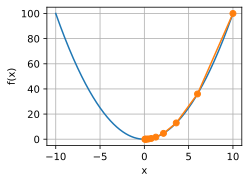

In [114]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
    
show_trace(results, f)

----------------- YOUR TURN! -----------------

Now try to run again the gd() function using first a smaller eta (e.g. eta = 0.05) and then again with a larger eta (e.g. eta = 1.1).

Plot and consider what you see and discuss what that means.

### Local Minima

epoch 10, x: -1.528165


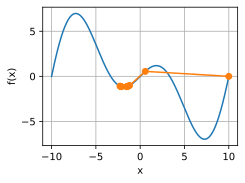

In [115]:
c = torch.tensor(0.15 * np.pi)
def f(x):  # Objective function
    return x * torch.cos(c * x)
def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

### Multivariate Gradient Descent

In [118]:
# we need two more helper functions. The first uses an update function and applies it 
# 20 times to the initial value. 
# The second helper visualizes the trajectory of x.

def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e', markersize=3, linewidth=1)
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 2.0, 0.1),
                          torch.arange(-3.0, 2.0, 0.1), indexing='ij')
    d2l.plt.contourf(x1, x2, f(x1, x2), levels=20, cmap='Blues_r')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')


epoch 20, x1: -0.057646, x2: -0.000073


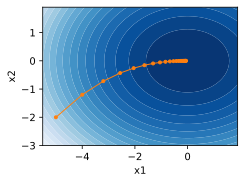

In [119]:
# define the 2D objective function and its gradient:
# x = (x1, x2)
# f(x) = x1^2 + 2 * x2^2
# f'(x) = (2 * x1, 4 * x2)

def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_2d_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)


eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))


### Adaptive Methods

What if we could determine 𝜂 automatically or get rid of having to select a learning rate at all? A possibility is to look at second-order methods:
- Newton's method
- Preconditioning

epoch 10, x: tensor(0.)


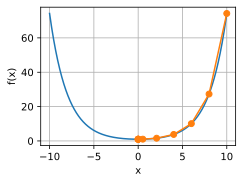

In [120]:
c = torch.tensor(0.5)
def f(x):  # Objective function
    return torch.cosh(c * x)
def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

Let's try with a non-convex function:

epoch 10, x: tensor(26.8341)


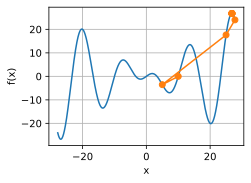

In [121]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


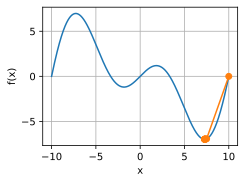

In [122]:
show_trace(newton(0.5), f)

## Stocastic Gradient Descent

We will compare SGD with gradient descent by adding random noise with a mean of 0
and a variance of 1 to the gradient to simulate a stochastic gradient descent.

In [123]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function
    return 2 * x1, 4 * x2

In [124]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr() # lr is defined outside this function
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.008587, x2: 0.083112


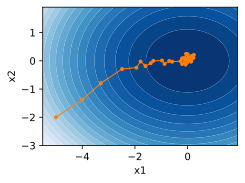

In [125]:
def constant_lr():
    return 1    

eta = 0.1
lr = constant_lr
show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

Even after 50 steps the quality is still not so good. Even worse, it will not improve after additional steps (you are encouraged to experiment with a larger number of steps to confirm this). 

This leaves us with the only alternative: change the learning rate 𝜂.
However, if we pick this too small, we will not make any meaningful progress initially. On the other hand, if we pick it too large, we will not get a good solution, as seen above. 

The only way to resolve these conflicting goals is to reduce the learning rate dynamically as optimization progresses.


### Dynamic Learning Rate (Scheduler)

We aleready defined the constant lr function. Now we define an exponential lr and a polinomial lr.

epoch 50, x1: -0.759427, x2: 0.039412


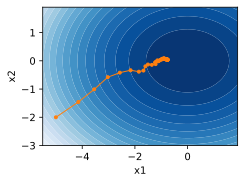

In [126]:
def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t=1
lr = exponential_lr
show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

#Note: this can lead to premature stopping, failing to converge to the optimal solution.


epoch 50, x1: 0.148565, x2: 0.128624


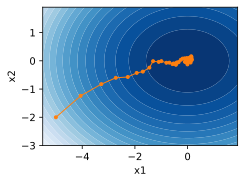

In [127]:
def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)
t=1
lr = polynomial_lr
show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## Minibatch Stochastic Gradient Descent

### Again: computational time matters

To keep matters simple, consider matrix-matrix multiplication, say A = BC. We have a number of options for calculating A. For instance, we could try the following:

- We could compute A𝑖 𝑗 = B𝑖,:C:, 𝑗 , i.e., we could compute it elementwise by means of dot products.
- We could compute A:, 𝑗 = BC:, 𝑗 , i.e., we could compute it one column at a time. Likewise we could compute A one row A𝑖,: at a time.
- We could simply compute A = BC.
- We could break B and C into smaller block matrices and compute A one block at a time.

In [128]:
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [129]:
class Timer:  #@save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        """Start the timer."""
        self.tik = time.time()
    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)
    def sum(self):
        """Return the sum of time."""
        return sum(self.times)
    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()
    
timer = Timer()

In [130]:
# Compute A = BC one element at a time
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

0.7242431640625

In [131]:
# Compute A = BC one column at a time
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.03353118896484375

In [132]:
# Compute A = BC in one go
timer.start()
A = torch.mm(B, C)
timer.stop()

0.0009353160858154297

 In short, it is highly advisable to use vectorization (and matrices) whenever possible.

### Implementation from scratch

Let’s have a look at how minibatches are efficiently generated from data. In the following we use a dataset developed by NASA to test the wing noise from different aircraft to compare these optimization algorithms. For convenience we only use the first 1500 examples. The data is whitened for preprocessing, i.e., we remove the mean and rescale the variance to 1 per coordinate.

In [133]:
#@save
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat',
                           '76e5be1548fd8222e5074cf0faae75edff8cf93f')
#@save
def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'),
                         dtype=np.float32, delimiter='\t')
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),
                               batch_size, is_train=True)
    return data_iter, data.shape[1]-1

In [134]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad) # this is the same as p.data = p.data - hyperparams['lr'] *  p.grad
        p.grad.data.zero_() # reset gradient to zero

In [135]:
#@save
def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs] ) #
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0] # number of examples processed
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]


Let’s see how optimization proceeds for batch gradient descent. This can be achieved by setting the minibatch size to 1500 (i.e., to the total number of examples).

As a result the model parameters are updated only once per epoch. 

loss: 0.254, 0.009 sec/epoch


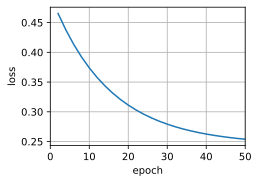

In [156]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(
        sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

# GRADIENT DESCENT example (passing the full dataset each iteration)
gd_res = train_sgd(0.05, 1500, 50)

# the loss function stops decreasing very soon, and eventually starts increasing again. This is because the learning rate is too high.

How does the progress look like after 10 epochs?

------------------------------------------------
When the batch size equals 1, we use stochastic gradient descent for optimization. For simplicity of implementation we picked a constant (albeit small) learning rate. 

In stochastic gradient descent, the model parameters are updated whenever an example is processed. In our case this amounts to 1500 updates per epoch. 

loss: 0.245, 0.216 sec/epoch


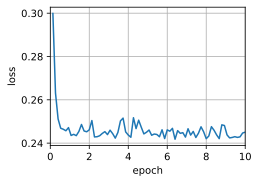

In [157]:
# STOCHASTIC GRADIENT DESCENT example (passing one example each iteration)
sgd_res = train_sgd(0.005, 1, 10)

How's the optimization going now? How does the time to run an epoch compare to the gradient descent?

-------------------------------------------------
Finally, when the batch size equals 100, we use minibatch stochastic gradient descent for optimization.

loss: 0.242, 0.015 sec/epoch


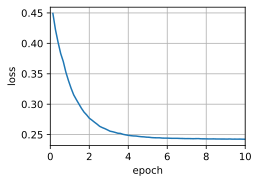

In [158]:
# MINI-BATCH GRADIENT DESCENT example (passing 40 examples each iteration)
mini1_res = train_sgd(0.05, 100, 10)

minibatch SGD is the most efficient way to optimize the model parameters: better performances and more efficient computationally.

Try to change the batch size and see how the time to compute an epoch changes 


loss: 0.245, 0.033 sec/epoch


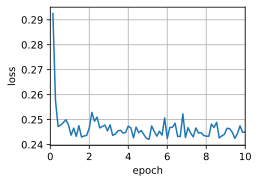

In [159]:
mini2_res = train_sgd(0.05, 10, 10)

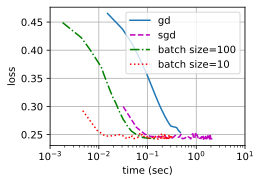

In [160]:
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
         'time (sec)', 'loss', xlim=[1e-3, 10],
         legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])
d2l.plt.gca().set_xscale('log')


### Concise Implementation

In Gluon, we can use the Trainer class to call optimization algorithms. This is used to im- plement a generic training function. 

In [161]:
#@save
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    # Initialization
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(module):
        if type(module) == nn.Linear:
            torch.nn.init.normal_(module.weight, std=0.01)
    net.apply(init_weights)
    optimizer = trainer_fn(net.parameters(), **hyperparams) # Can be whatever optimizer you want
    loss = nn.MSELoss(reduction='none')
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                # `MSELoss` computes squared error without the 1/2 factor
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss) / 2,))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')

loss: 0.242, 0.033 sec/epoch


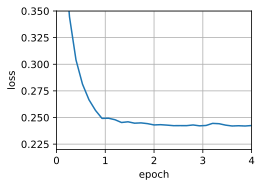

In [162]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

## Other famous Optimization algorithms

### Momentum

Accelerated gradient methods, such as gradients with momentum, replace the gradient computation by a “leaky average”, averaged over multiple past gradients. The new gradient replacement no longer points into the direction of steepest descent on a particular instance any longer but rather in the direction of a weighted average of past gradients.

This is particularly useful when we have ill-conditioned Problems like the one illlustrated below:

epoch 20, x1: -0.943467, x2: -0.000073


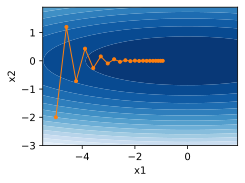

In [163]:
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, d2l.train_2d(gd_2d))

By construction, the gradient in the $𝑥_2$ direction is much higher and changes much more rapidly than in the horizontal $𝑥_1$ direction. Thus we are stuck between two undesirable choices: if we pick a small learning rate we ensure that the solution does not diverge in the 𝑥2 direction but we are saddled with slow convergence in the 𝑥1 direction. Conversely, with a large learning rate we progress rapidly in the 𝑥1 direction but diverge in 𝑥2.

See what happen with a slightly higher LR:

epoch 20, x1: -0.387814, x2: -1673.365109


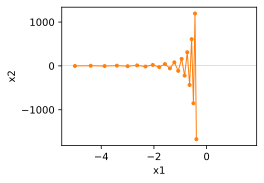

In [164]:
eta = 0.6

show_trace_2d(f_2d, d2l.train_2d(gd_2d))

Using \( $v_t$ \) instead of the gradient \( $g_t$ \) yields the following update equations:  


$v_t \leftarrow \beta v_{t-1} + g_{t, t-1}, \quad$
$x_t \leftarrow x_{t-1} - \eta v_t.$

Note that for \( $\beta = 0$ \) we recover regular gradient descent.

epoch 20, x1: 0.007188, x2: 0.002553


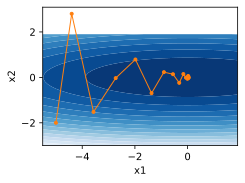

In [166]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
show_trace_2d(f_2d, d2l.train_2d(momentum_2d))


Let’s see what happens when we decrease the momentum parameter. Halving
it to 𝛽= 0.25 leads to a trajectory that barely converges at all. Nonetheless, it is a lot better
than without momentum (when the solution diverges).

epoch 20, x1: -0.126340, x2: -0.186632


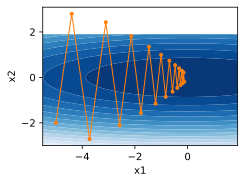

In [168]:
eta, beta = 0.6, 0.25
show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

#### Concise impelmentation of Momentum in SDG

loss: 0.255, 0.037 sec/epoch


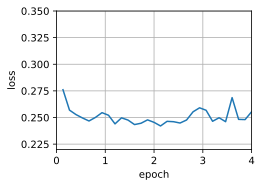

In [171]:
trainer = torch.optim.SGD
# https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html
# torch.optim.SGD(params, lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False, *, maximize=False, foreach=None, differentiable=False, fused=None)

d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

### Adagrad

Let’s begin by considering learning problems with features that occur infrequently (aka training on sparse features).

Parameters associated with infrequent features only receive meaningful updates whenever these features occur. Given a decreasing learning rate we might end up in a situation where the parameters for common features converge rather quickly to their optimal values, whereas for infrequent features we are still short of observing them sufficiently frequently before their optimal values can be determined. In other words, the learning rate either decreases too slowly for frequent features or too quickly for infrequent ones.

A possible hack to redress this issue would be to count the number of times we see a particular feature and to use this as a clock for adjusting learning rates.

Adagrad by Duchi et al. (2011) addresses this by replacing the rather crude counter 𝑠(𝑖, 𝑡) by an aggregate of the squares of previously observed gradients. In particular, it uses $𝑠(𝑖, 𝑡 ) = 𝑠(𝑖, 𝑡-1) + (𝜕_𝑖 𝑓 (x))^2$ as a means to adjust the learning rate. 

The algorithm looks like:

$g_t = \frac{\partial \ell(y_t, f(x_t, w))}{\partial w}$

$s_t = s_{t-1} + g_t^2$

$w_t = w_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} \cdot g_t$

 𝜂 is the learning rate and 𝜖 is an additive constant that ensures that we do not divide by 0.


We use the same problem as before (the ill-conditioned one):

epoch 20, x1: -2.382563, x2: -0.158591


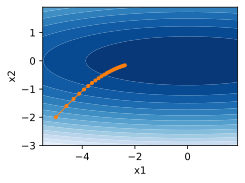

In [172]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2


eta = 0.4
show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

As we increase the learning rate to 2 we see much better behavior. This already indicates that the decrease in learning rate might be rather aggressive, even in the noise-free case and we need to ensure that parameters converge appropriately.

epoch 20, x1: -0.396477, x2: -0.000023


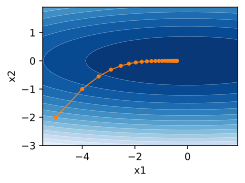

In [173]:
eta = 1
show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

#### Concise implementation

loss: 0.242, 0.038 sec/epoch


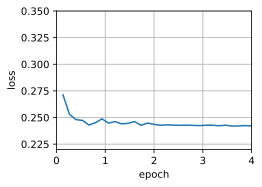

In [174]:
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

### RMSprop

One of the key issues of Adagrad is that the learning rate decreases at a predefined schedule of effectively O($1/\sqrt{𝑡}$). While this is generally appropriate for convex problems, it might not be ideal for nonconvex ones, such as those encountered in deep learning. Adagrad accumulates the squares of the gradient $g_𝑡$ into a state vector $s_𝑡 = s_{𝑡−1} + g_𝑡^2$. As a result $s_𝑡$ keeps on growing without bound due to the lack of normalization, essentially linearly as the algorithm converges.

One way of fixing this problem would be to use $s_𝑡/𝑡$. Unfortunately it might take a very long time until the limit behavior starts to matter since the procedure remembers the full trajectory of values. An alternative is to use a leaky average in the same way we used in the momentum method.

Tieleman and Hinton (2012) proposed the RMSProp algorithm as a simple fix to decouple rate scheduling from coordinate-adaptive learning rates.

$s_t \leftarrow \gamma s_{t-1} + (1 - \gamma) g_t^2$

$x_t \leftarrow x_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} g_t$

constant 𝜖 > 0 is typically set to $10^{−6}$ to ensure that we do not suffer from division by zero or overly large step sizes. 

As per the $\beta$ hyperparameter of momentum, we use 1+ 𝛾 + 𝛾^2+ ... = 1/(1 - 𝛾). Hence the sum of weights is normalized to 1 with a half-life time of an observation of 1/𝛾.


# -------------------

#### AdaGrad: “Remember all the gradients ever seen.”
- great for convex or sparse problems.
- bad for long training — too cautious.
#### RMSProp: “Forget gradually with an exponential decay.”
- keeps adapting indefinitely.
- designed for non-stationary deep networks.

epoch 20, x1: -0.010599, x2: 0.000000


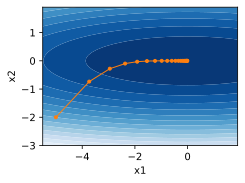

In [175]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

#### Concise implementation

loss: 0.245, 0.038 sec/epoch


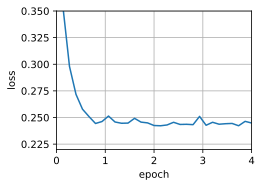

In [176]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr': 0.01, 'alpha': 0.9},
data_iter)

### Adam

Adam (Kingma and Ba, 2014) combines all these techniques into one efficient learning algorithm. As expected, this is an algorithm that has become rather popular as one of the more robust and effective optimization algorithms to use in deep learning.

One of the key components of Adam is that it uses exponential weighted moving averages (also known as leaky averaging) to obtain an estimate of both the momentum and also the
second moment of the gradient. 

It uses two state variables:

$v_t \leftarrow \beta_1 v_{t-1} + (1 - \beta_1) g_t$

$s_t \leftarrow \beta_2 s_{t-1} + (1 - \beta_2) g_t^2$

 𝛽1 and 𝛽2 are nonnegative weighting parameters. Common choices for them are 𝛽1 = 0.9 and 𝛽2 = 0.999. That is, the variance estimate moves much more slowly than the
momentum term.

For reasons related to initial biases induced by v0=s0=0, it is better to use normalized state variables:

$\hat{v}_t = v_t / (1 -  \beta_1^t), \quad$
$\hat{s}_t = s_t / (1 -  \beta_2^t)$

then we rescale the gradient


$g'_t = (\eta \hat{v}_t) / (\sqrt{\hat{s}_t} +\epsilon)$

finally the update is the following

$x_t \leftarrow x_{t-1} - g'_t$

In [177]:
def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1


#### Concise implementation

loss: 0.244, 0.043 sec/epoch


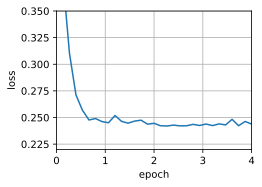

In [178]:
trainer = torch.optim.Adam
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)


#### Yogi (study on your own)

One of the problems of Adam is that it can fail to converge even in convex settings when the second moment estimate in s𝑡 blows up. Infact, in 

$s_t \leftarrow \beta_2 s_{t-1} + (1 - \beta_2) g_t^2$

if the gradient magnitude changes drastically, Adam’s $s_t$ can get too large, causing an overly small effective learning rate and slow convergence.

As a fix Zaheer et al. (2018) proposed a refined update (and initialization) for s𝑡.

$s_t = s_{t-1} + (1 - \beta_2) \; \text{sign}(s_{t-1} - g_t^2) \cdot g_t^2$

where the **sign function** sign(x) is defined as:

- $+1$ if $x > 0$  
- $0$ if $x = 0$  
- $-1$ if $x < 0$

**Key differences:**

- Instead of always increasing $s_t$, the update moves $s_t$ toward $g_t^2$ in a controlled way.  
- If $g_t^2$ is smaller than $s_{t-1}$, the `sign` term ensures $s_t$ decreases.  
- If $g_t^2$ is larger, $s_t$ increases — but gradually.  
- This prevents $s_t$ from growing too fast and stabilizes the learning rate over time.

In [ ]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(
                torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim)

## Simple LR Scheduler

### Learning Rate Schedulers in PyTorch

In PyTorch, **learning rate schedulers** adjust the optimizer’s learning rate during training to improve convergence and avoid getting stuck in poor local minima.

Schedulers are available in [`torch.optim.lr_scheduler`](https://docs.pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) and can be used with any optimizer.


---

#### **Common Schedulers**

##### 1. StepLR
- Reduces the learning rate by a factor every fixed number of epochs.
- Use case: Simple decay strategy.
- Formula: `lr = lr * gamma` every `step_size` epochs. 

##### 2. MultiStepLR
- Like StepLR, but with multiple specific decay points.
- Use case: Predefined decay epochs.
- Example code belo (Note: the network is not defined here, it could be any network. This is just to illustrate how the scheduler works)


```python

net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones=[15, 30], gamma=0.5)
def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr
```

##### 3. ExponentialLR
- Multiplies the learning rate by gamma every epoch.
- Use case: Smooth exponential decay.

##### 4. CosineAnnealingLR
- Learning rate follows a cosine curve from `max_lr` to `min_lr`.
- Use case: Gradual restarts or cyclic schedules.

##### 5. ReduceLROnPlateau
- Reduces the learning rate when a monitored metric stops improving.
- Use case: Validation-based adjustments.

##### 6. OneCycleLR
- Increases then decreases the learning rate in one cycle.
- Use case: Fast convergence (Smith, 2018).

##### 7. LambdaLR
- Custom learning rate schedule via a lambda function.
- Use case: Fully customized decay logic.